# Importing Libraries

In [143]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
from nltk.tokenize import word_tokenize
import warnings
warnings.simplefilter(action='ignore')
plt.style.use('ggplot')

## 1. For sherlock novel

In [144]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abhinav
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Abhinav
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Abhinav Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

####  Reading Novel and converting it into a text variable

In [254]:
file = open(r"sherlock.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)

In [255]:
type(file)

_io.TextIOWrapper

In [256]:
text[:2000] #first 2000 characters of out Novel T1

"\ufeffProject Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan DoyleThis eBook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever.  You may copy it, give it away orre-use it under the terms of the Project Gutenberg License includedwith this eBook or online at www.gutenberg.netTitle: The Adventures of Sherlock HolmesAuthor: Arthur Conan DoyleRelease Date: November 29, 2002 [EBook #1661]Last Updated: May 20, 2019Language: EnglishCharacter set encoding: UTF-8*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***Produced by an anonymous Project Gutenberg volunteer and Jose MenendezcoverThe Adventures of Sherlock Holmesby Arthur Conan DoyleContents   I.     A Scandal in Bohemia   II.    The Red-Headed League   III.   A Case of Identity   IV.    The Boscombe Valley Mystery   V.     The Five Orange Pips   VI.    The Man with the Twisted Lip   VII.   The Adventure of the Blue Carbuncle   VIII.  The Adventure of the Spe

#### Preprocessing

In [252]:
#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = ""
for char in text:
    if char not in punctuations:
        cleantext = cleantext + char
        
#Converting the text into lower case         
cleantext = cleantext.lower()

In [253]:
cleantext[:2000]  #first 2000 characters of our clean text

'\ufeffproject gutenbergs the adventures of sherlock holmes by arthur conan doylethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergnettitle the adventures of sherlock holmesauthor arthur conan doylerelease date november 29 2002 ebook 1661last updated may 20 2019language englishcharacter set encoding utf8 start of this project gutenberg ebook the adventures of sherlock holmes produced by an anonymous project gutenberg volunteer and jose menendezcoverthe adventures of sherlock holmesby arthur conan doylecontents   i     a scandal in bohemia   ii    the redheaded league   iii   a case of identity   iv    the boscombe valley mystery   v     the five orange pips   vi    the man with the twisted lip   vii   the adventure of the blue carbuncle   viii  the adventure of the speckled band   ix    the adventure o

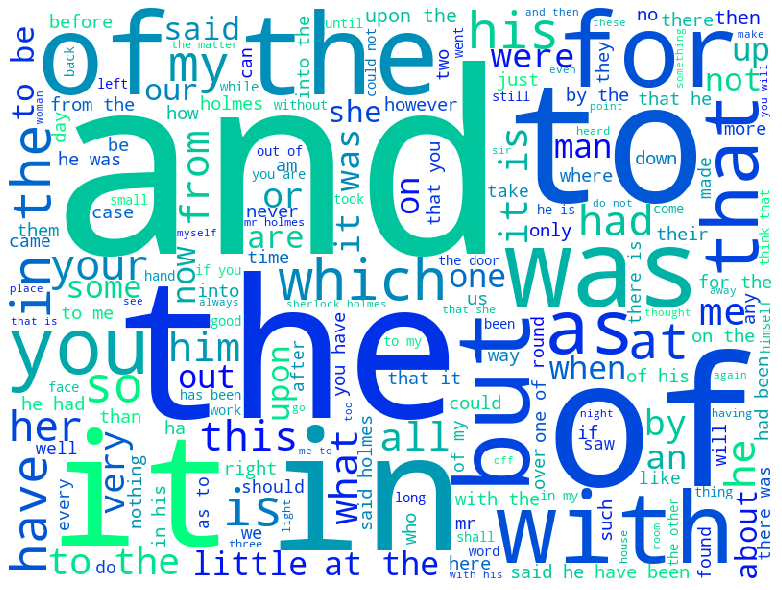

In [10]:
# Word cloud without removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

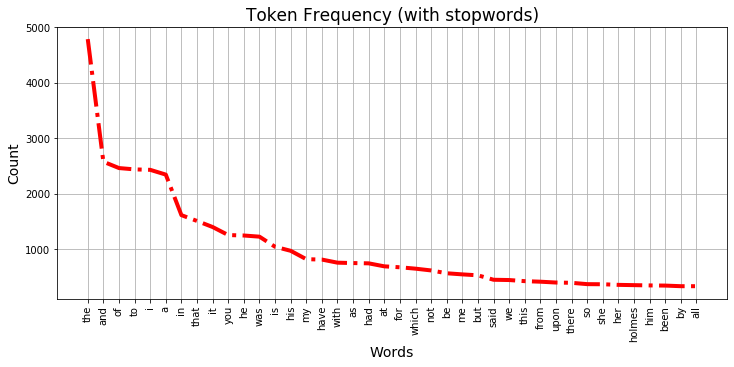

In [11]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [12]:
tokens = word_tokenize(cleantext)
tokens[:15]   #first 15 tokens

['\ufeffproject',
 'gutenbergs',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doylethis',
 'ebook',
 'is',
 'for',
 'the']

In [13]:
type(tokens)

list

#### Removing stopwords and tokenising

In [14]:
# Removing stopwords and storing it into finaltext
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleantext)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)

In [15]:
finaltext[:2000] #first 2000 characters of our final text

'\ufeffproject  gutenbergs  adventures  sherlock  holmes  arthur  conan  doylethis  ebook  use  anyone  anywhere  cost  withalmost  restrictions  whatsoever  may  copy  give  away  orreuse  terms  project  gutenberg  license  includedwith  ebook  online  wwwgutenbergnettitle  adventures  sherlock  holmesauthor  arthur  conan  doylerelease  date  november  29  2002  ebook  1661last  updated  may  20  2019language  englishcharacter  set  encoding  utf8  start  project  gutenberg  ebook  adventures  sherlock  holmes  produced  anonymous  project  gutenberg  volunteer  jose  menendezcoverthe  adventures  sherlock  holmesby  arthur  conan  doylecontents  scandal  bohemia  ii  redheaded  league  iii  case  identity  iv  boscombe  valley  mystery  v  five  orange  pips  vi  man  twisted  lip  vii  adventure  blue  carbuncle  viii  adventure  speckled  band  ix  adventure  engineers  thumb  x  adventure  noble  bachelor  xi  adventure  beryl  coronet  xii  adventure  copper  beechesi  scandal 

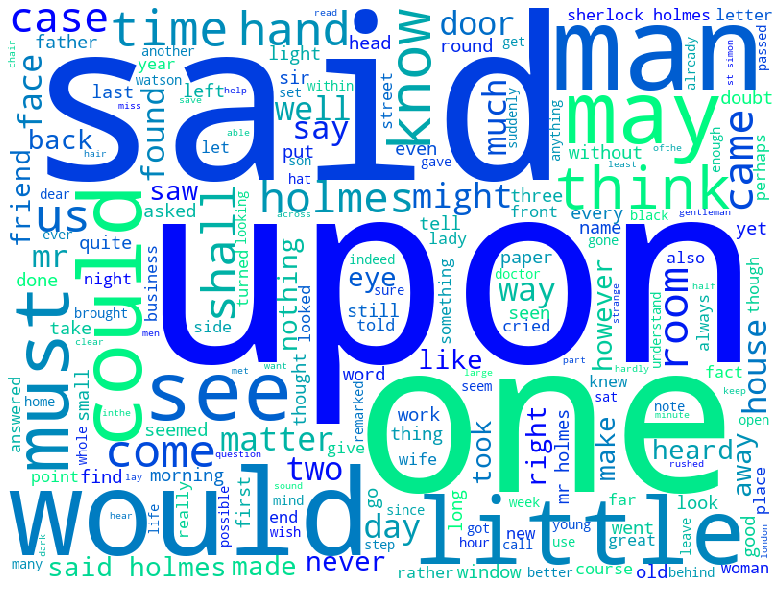

In [16]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#### Frequency distribution of tokens

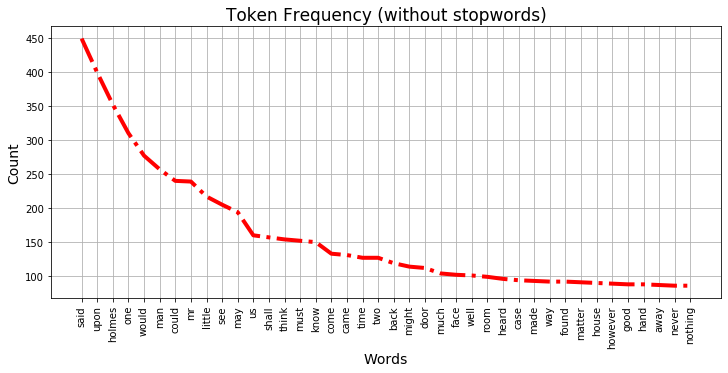

In [17]:
tokens = word_tokenize(finaltext)
tokens = [i for i in tokens if not i in stop_words]
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

#### Frequency Distribution of Tags

In [18]:
tagged = nltk.pos_tag(tokens) 
tagged[:15] #first 15 POS tags

[('\ufeffproject', 'JJ'),
 ('gutenbergs', 'NN'),
 ('adventures', 'NNS'),
 ('sherlock', 'VBP'),
 ('holmes', 'NNS'),
 ('arthur', 'VBP'),
 ('conan', 'VB'),
 ('doylethis', 'NN'),
 ('ebook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('cost', 'VBZ'),
 ('withalmost', 'NN'),
 ('restrictions', 'NNS')]

In [19]:
type(tagged)

list

In [20]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 15904, 'JJ': 8866, 'VBD': 4097, 'NNS': 3724, 'RB': 3582, 'VBP': 2023, 'VB': 1742, 'VBN': 1683, 'VBG': 1607, 'IN': 1266, 'MD': 1157, 'CD': 811, 'VBZ': 556, 'PRP': 196, 'JJR': 152, 'DT': 132, 'JJS': 132, 'WP': 128, 'RP': 86, 'RBR': 78, 'FW': 47, 'CC': 35, 'WDT': 32, 'NNP': 31, 'WP$': 16, 'WRB': 12, '$': 8, 'RBS': 7, 'UH': 4, 'PRP$': 4, 'EX': 2})


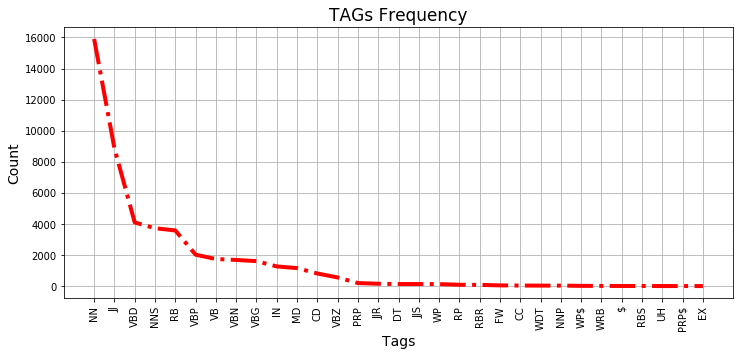

In [21]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('TAGs Frequency',size=17)
plt.xlabel('Tags',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [54]:
from collections import Counter
counts = Counter(tag for word,tag in tagged)

In [126]:
print("Counts of each tags in Sherlock is shown below ")
print()
print(counts)

Counts of each tags in Sherlock is shown below 

Counter({'NN': 15904, 'JJ': 8866, 'VBD': 4097, 'NNS': 3724, 'RB': 3582, 'VBP': 2023, 'VB': 1742, 'VBN': 1683, 'VBG': 1607, 'IN': 1266, 'MD': 1157, 'CD': 811, 'VBZ': 556, 'PRP': 196, 'JJR': 152, 'DT': 132, 'JJS': 132, 'WP': 128, 'RP': 86, 'RBR': 78, 'FW': 47, 'CC': 35, 'WDT': 32, 'NNP': 31, 'WP$': 16, 'WRB': 12, '$': 8, 'RBS': 7, 'UH': 4, 'PRP$': 4, 'EX': 2})


In [56]:
list1 = []
for item in tagged:
    if (item[1] in {'NN','NNP','NNS'}):
        list1.append(item)

In [57]:
print("Total number of Nouns in Sherlock are : "+ str(len(list1)))

Total number of Nouns in Sherlock are : 19659


In [58]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Abhinav
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
list2 = {}
from nltk.corpus import wordnet

for item in list1:
    cat = wordnet.synsets(item[0])
    for i in cat:
        if i.lexname()[0] == 'n':
            if i.lexname() in list2:
                list2[i.lexname()]+=1
            else:
                list2[i.lexname()]=1

In [129]:
print('Categories of Nouns in Wordnet and their respective frequency is given below-.. (for Sherlock)')
print()
print(list2)
print()
print('Total categoris in Nouns in the wordnet are : ' + str(len(list2)))

Categories of Nouns in Wordnet and their respective frequency is given below-.. (for Sherlock)

{'verb.stative': 14665, 'verb.creation': 6660, 'verb.possession': 8872, 'verb.communication': 16371, 'verb.cognition': 13286, 'verb.social': 9343, 'verb.motion': 11758, 'verb.consumption': 1851, 'verb.contact': 8927, 'verb.change': 11697, 'verb.body': 3425, 'verb.perception': 6448, 'verb.competition': 2906, 'verb.emotion': 1366, 'verb.weather': 182}

Total categoris in Nouns in the wordnet are : 15


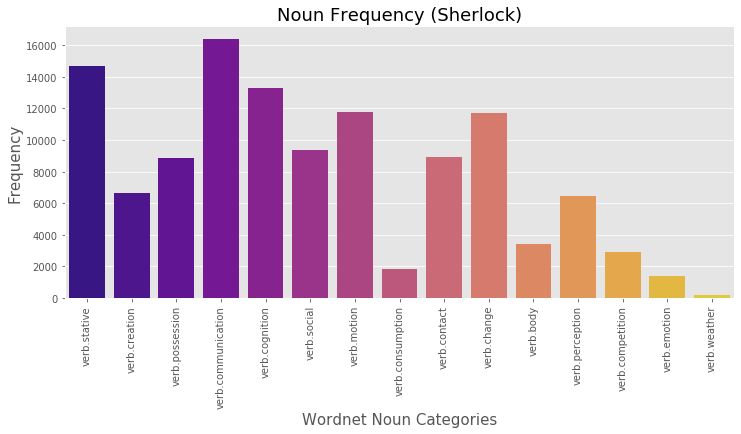

In [127]:
X = list(list2.keys())
y = list(list2.values())
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.title('Noun Frequency (Sherlock)',size=18)
plt.xlabel('Wordnet Noun Categories',size=15)
plt.ylabel('Frequency',size=15)
sns.barplot(X,y,palette='plasma')

In [121]:
list1 = []
for item in tagged:
    if (item[1] in {'VB','VBP','VBG','VBD','VBN','VBZ'}):
        list1.append(item)
print("Total number of Verbs in Sherlock are : "+ str(len(list1)))

Total number of Verbs in Sherlock are : 11708


In [122]:
list2 = {}
from nltk.corpus import wordnet

for item in list1:
    cat = wordnet.synsets(item[0])
    for i in cat:
        if i.lexname()[0] == 'v':
            if i.lexname() in list2:
                list2[i.lexname()]+=1
            else:
                list2[i.lexname()]=1

In [130]:
print('Categories of Verbs in Wordnet and their respective frequency is given below.. (for Sherlock)')
print()
print(list2)
print()
print('Total categoris in Verbs in the wordnet are : ' + str(len(list2)))

Categories of Verbs in Wordnet and their respective frequency is given below.. (for Sherlock)

{'verb.stative': 14665, 'verb.creation': 6660, 'verb.possession': 8872, 'verb.communication': 16371, 'verb.cognition': 13286, 'verb.social': 9343, 'verb.motion': 11758, 'verb.consumption': 1851, 'verb.contact': 8927, 'verb.change': 11697, 'verb.body': 3425, 'verb.perception': 6448, 'verb.competition': 2906, 'verb.emotion': 1366, 'verb.weather': 182}

Total categoris in Verbs in the wordnet are : 15


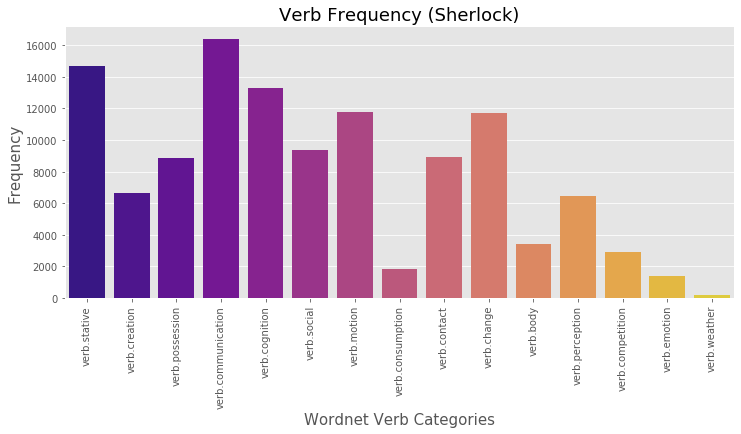

In [131]:
X = list(list2.keys())
y = list(list2.values())
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.title('Verb Frequency (Sherlock)',size=18)
plt.xlabel('Wordnet Verb Categories',size=15)
plt.ylabel('Frequency',size=15)
sns.barplot(X,y,palette='plasma')

In [137]:
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [156]:
doc = nlp(finaltext)

In [157]:
print([(X.text, X.label_) for X in doc.ents])

[('arthur', 'PERSON'), ('arthur', 'PERSON'), ('november', 'DATE'), ('2002', 'DATE'), ('20', 'CARDINAL'), ('arthur', 'PERSON'), ('five', 'CARDINAL'), ('vii', 'ORG'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('andyet', 'PERSON'), ('one', 'CARDINAL'), ('first', 'ORDINAL'), ('baker', 'PERSON'), ('week', 'DATE'), ('daily', 'DATE'), ('twentieth', 'DATE'), ('march', 'DATE'), ('1888—i', 'QUANTITY'), ('baker', 'PERSON'), ('wavedme', 'PERSON'), ('watson', 'PERSON'), ('puton', 'PERSON'), ('seven', 'CARDINAL'), ('watson', 'PERSON'), ('knowi', 'PERSON'), ('thursday', 'DATE'), ('six', 'CARDINAL'), ('london', 'GPE'), ('wherehe', 'ORG'), ('professioni', 'GPE'), ('seventeen', 'CARDINAL'), ('one', 'CARDINAL'), ('tonight', 'TIME'), ('eight', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('german', 'NORP'), ('eglonitz', 'PERSON'), ('german', 'NORP'), ('frenchman', 'NORP'), ('russian', 'NORP'), ('german', 'NORP'), ('german', 'NORP'), ('hoofs', 'PERSON'), ('bell', 'ORG'), ('fi

In [158]:
entity_list = {}
entity_list = [(X.text, X.label_) for X in doc.ents]

In [159]:
entity_person = [X for X in entity_list if X[1]=='PERSON']
entity_organisation = [X for X in entity_list if X[1]=='ORG']
entity_location = [X for X in entity_list if X[1]=='LOC']

In [267]:
print(entity_person[:10])

[('arthur', 'PERSON'), ('arthur', 'PERSON'), ('arthur', 'PERSON'), ('andyet', 'PERSON'), ('baker', 'PERSON'), ('baker', 'PERSON'), ('wavedme', 'PERSON'), ('watson', 'PERSON'), ('puton', 'PERSON'), ('watson', 'PERSON')]


In [164]:
print('Total entities for Persons are : ' + str(len(entity_person)))
print('Total entities for Organisations are : ' + str(len(entity_organisation)))
print('Total entities for Locations are : ' + str(len(entity_location)))

Total entities for Persons are : 644
Total entities for Organisations are : 66
Total entities for Locations are : 21


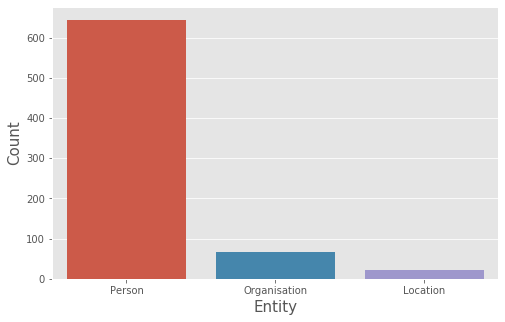

In [172]:
plot = [len(entity_person),len(entity_organisation),len(entity_location)]
X = ['Person','Organisation','Location']
plt.figure(figsize=(8,5))
plt.xlabel('Entity',size=15)
plt.ylabel('Count',size=15)
sns.barplot(X,plot)

#### Performance Measure

In [297]:
txt = cleantext[18000:20000]

In [299]:
doc = nlp(txt)
entity_list = {}
entity_list = [(X.text, X.label_) for X in doc.ents]
entity_person = [X for X in entity_list if X[1]=='PERSON']
entity_organisation = [X for X in entity_list if X[1]=='ORG']
entity_location = [X for X in entity_list if X[1]=='LOC']
print('Person as entity')
print()
print(entity_person)
print()
print('Organization as entity')
print()
print(entity_organisation)
print()
print('Location as entity')
print()
print(entity_location)

Person as entity

[('kramm', 'PERSON'), ('carte blanche', 'PERSON'), ('st johns', 'PERSON'), ('watson', 'PERSON')]

Organization as entity

[('the royal brougham', 'ORG'), ('house', 'ORG')]

Location as entity

[]


##### For word length vs Frequency distribution

In [49]:
import numpy as np
bin_size=np.linspace(0,16)

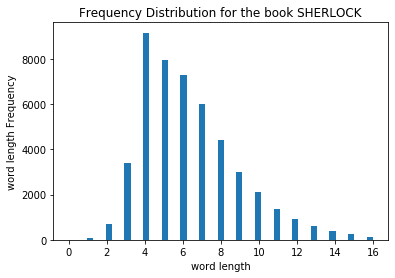

In [50]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book SHERLOCK')
plt.show()


## 1. For jane eyre  novel

In [270]:
file_eyre = open(r"jane_eyre.txt",encoding='utf-8')
wordslist_eyre = file_eyre.read().splitlines() # to escape \n occurence
wordslist_eyre = [i for i in wordslist_eyre if i!='']
text_eyre = ""
text_eyre = text_eyre.join(wordslist_eyre)


In [271]:
text_eyre[:2000] #first 2000 characters of the novel

'\ufeffThe Project Gutenberg eBook, Jane Eyre, by Charlotte Bronte, Illustratedby F. H. TownsendThis eBook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever.  You may copy it, give it away orre-use it under the terms of the Project Gutenberg License includedwith this eBook or online at www.gutenberg.orgTitle: Jane Eyre       an AutobiographyAuthor: Charlotte BronteRelease Date: April 29, 2007  [eBook #1260]Language: EnglishCharacter set encoding: ISO-646-US (US-ASCII)***START OF THE PROJECT GUTENBERG EBOOK JANE EYRE***Transcribed from the 1897 Service & Paton edition by David Price, emailccx074@pglaf.orgJANE EYREAN AUTOBIOGRAPHYBYCHARLOTTE BRONTE_ILLUSTRATED BY F. H. TOWNSEND_LondonSERVICE & PATON5 HENRIETTA STREET1897_The Illustrations__in this Volume are the copyright of_SERVICE & PATON, _London_TOW. M. THACKERAY, ESQ.,This WorkIS RESPECTFULLY INSCRIBEDBYTHE AUTHORPREFACEA preface to the first edition of "Jane Eyre" being unnecessary, I gavenone: 

In [272]:
#Creating a string which has all the punctuations to be removed
punctuations_eyre = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext_eyre = ""
for char in text_eyre:
    if char not in punctuations_eyre:
        cleantext_eyre = cleantext_eyre + char
        
#Converting the text into lower case         
cleantext_eyre = cleantext_eyre.lower()

In [273]:
cleantext_eyre[:2000] #first 2000 characters of clean text

'\ufeffthe project gutenberg ebook jane eyre by charlotte bronte illustratedby f h townsendthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergorgtitle jane eyre       an autobiographyauthor charlotte bronterelease date april 29 2007  ebook 1260language englishcharacter set encoding iso646us usasciistart of the project gutenberg ebook jane eyretranscribed from the 1897 service  paton edition by david price emailccx074pglaforgjane eyrean autobiographybycharlotte bronteillustrated by f h townsendlondonservice  paton5 henrietta street1897the illustrationsin this volume are the copyright ofservice  paton londontow m thackeray esqthis workis respectfully inscribedbythe authorprefacea preface to the first edition of jane eyre being unnecessary i gavenone this second edition demands a few words both of acknowle

In [274]:
tokens_eyre_t = word_tokenize(cleantext_eyre)
tokens_eyre_t[:15] #first 15 tokens

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'jane',
 'eyre',
 'by',
 'charlotte',
 'bronte',
 'illustratedby',
 'f',
 'h',
 'townsendthis',
 'ebook',
 'is']

In [275]:
type(tokens_eyre_t)

list

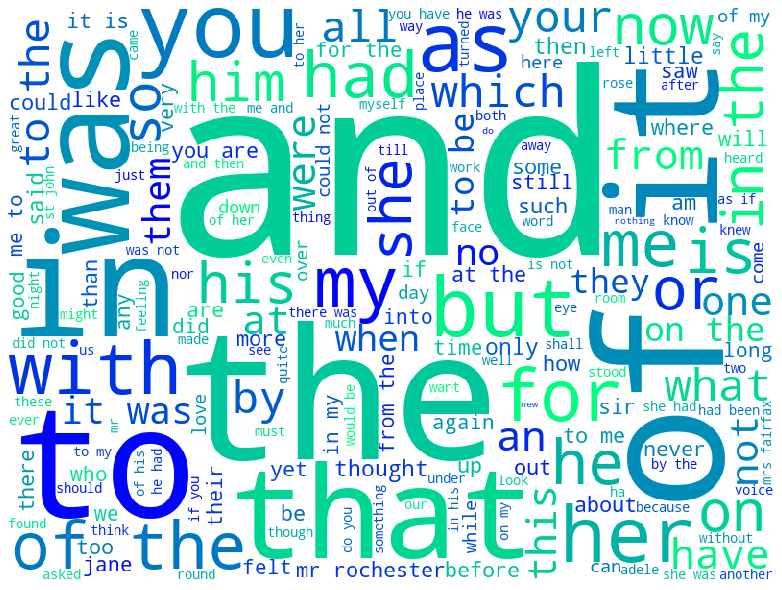

In [180]:
# Word cloud without removing stopwords
wordcloud_eyre_withStopwords = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext_eyre) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud_eyre_withStopwords) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

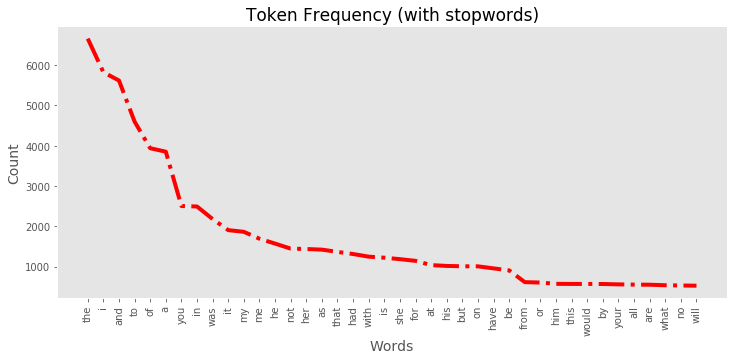

In [181]:
tokens_eyre = word_tokenize(cleantext_eyre)
freq_eyre = nltk.FreqDist(tokens_eyre)
freq_eyre = {k: v for k, v in sorted(freq_eyre.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_eyre.keys())[:40]
y = list(freq_eyre.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [276]:
# Removing stopwords and storing it into finaltext
stop_words_eyre = set(stopwords.words('english'))
tokens_eyre = word_tokenize(cleantext_eyre)
tokens_final_eyre = [i for i in tokens_eyre if not i in stop_words_eyre] # tokenising with removing stopwords
finaltext_eyre = "  "
finaltext_eyre = finaltext_eyre.join(tokens_final_eyre)

In [277]:
finaltext_eyre[:2000] #first 2000 characters of final text

'\ufeffthe  project  gutenberg  ebook  jane  eyre  charlotte  bronte  illustratedby  f  h  townsendthis  ebook  use  anyone  anywhere  cost  withalmost  restrictions  whatsoever  may  copy  give  away  orreuse  terms  project  gutenberg  license  includedwith  ebook  online  wwwgutenbergorgtitle  jane  eyre  autobiographyauthor  charlotte  bronterelease  date  april  29  2007  ebook  1260language  englishcharacter  set  encoding  iso646us  usasciistart  project  gutenberg  ebook  jane  eyretranscribed  1897  service  paton  edition  david  price  emailccx074pglaforgjane  eyrean  autobiographybycharlotte  bronteillustrated  f  h  townsendlondonservice  paton5  henrietta  street1897the  illustrationsin  volume  copyright  ofservice  paton  londontow  thackeray  esqthis  workis  respectfully  inscribedbythe  authorprefacea  preface  first  edition  jane  eyre  unnecessary  gavenone  second  edition  demands  words  acknowledgment  andmiscellaneous  remarkmy  thanks  due  three  quartersto

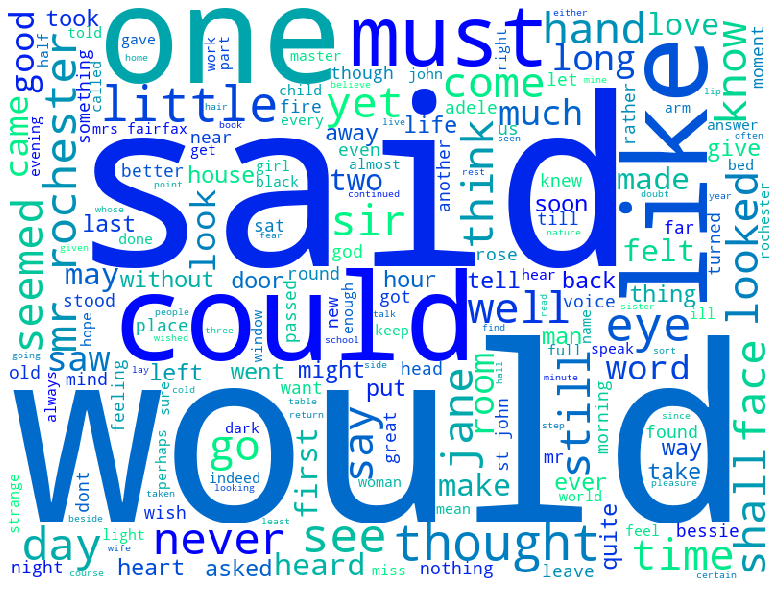

In [184]:
# Word cloud with removing stopwords
wordcloud_eyre_withoutStopWords = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext_eyre) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud_eyre_withoutStopWords) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

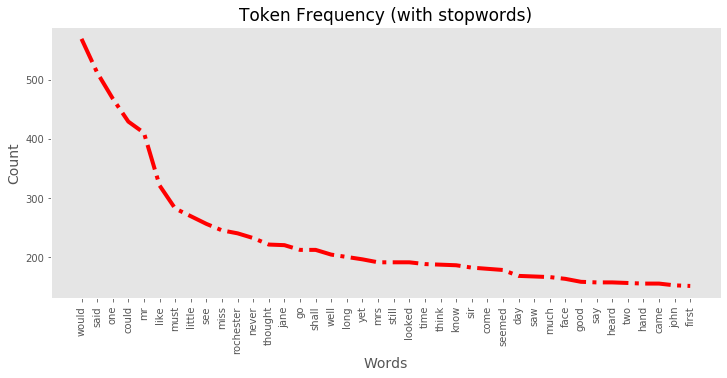

In [185]:
tokens_eyre = word_tokenize(finaltext_eyre)
tokens_eyre = [i for i in tokens_eyre if not i in stop_words_eyre]
freq_eyre = nltk.FreqDist(tokens_eyre)
freq_eyre = {k: v for k, v in sorted(freq_eyre.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_eyre.keys())[:40]
y = list(freq_eyre.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [186]:
tagged_eyre = nltk.pos_tag(tokens_eyre) 
tagged_eyre[:15] #first 15 tags

[('\ufeffthe', 'NN'),
 ('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('jane', 'NN'),
 ('eyre', 'NN'),
 ('charlotte', 'NN'),
 ('bronte', 'NN'),
 ('illustratedby', 'NN'),
 ('f', 'NN'),
 ('h', 'NN'),
 ('townsendthis', 'NN'),
 ('ebook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN')]

In [187]:
type(tagged_eyre)


list

In [188]:
from collections import Counter
counts_eyre = Counter( tag for word,  tag in tagged_eyre)
print(counts_eyre)

Counter({'NN': 29678, 'JJ': 16971, 'VBD': 7900, 'RB': 6534, 'NNS': 6488, 'VBP': 3692, 'VBN': 3378, 'VBG': 2973, 'VB': 2915, 'MD': 1828, 'IN': 1723, 'CD': 911, 'VBZ': 842, 'JJR': 290, 'JJS': 255, 'DT': 224, 'RBR': 201, 'WP': 171, 'PRP': 160, 'RP': 122, 'FW': 93, 'CC': 91, 'NNP': 59, 'WP$': 58, 'WDT': 35, 'WRB': 24, 'EX': 13, 'UH': 10, 'RBS': 8, 'PRP$': 5, 'PDT': 1, 'POS': 1})


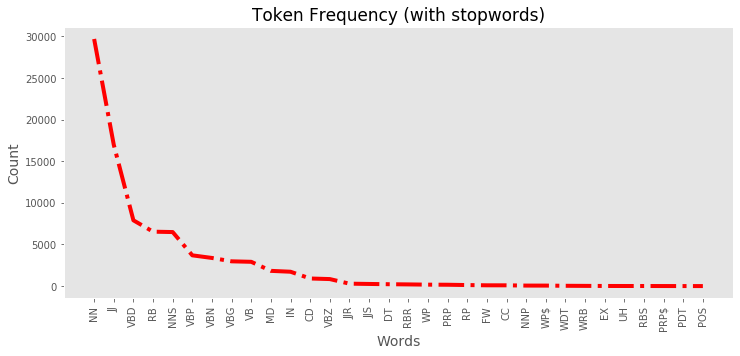

In [190]:
freq_tags_eyre = nltk.FreqDist(counts_eyre)
freq_tags_eyre = {k: v for k, v in sorted(freq_tags_eyre.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags_eyre.keys())[:40]
y = list(freq_tags_eyre.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.grid()
plt.show()

##### For word length vs Frequency distribution

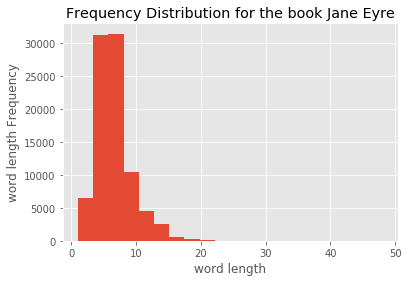

In [194]:
#Finding Wordlength and storing it as a list
wordLength_eyre = [len(r) for r in tokens_eyre]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength_eyre,bins=20)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book Jane Eyre')
plt.show()

In [233]:
from collections import Counter
counts = Counter(tag for word,tag in tagged_eyre)

In [234]:
print("Counts of each tags in Jane Eyre is shown below ")
print()
print(counts)

Counts of each tags in Jane Eyre is shown below 

Counter({'NN': 29678, 'JJ': 16971, 'VBD': 7900, 'RB': 6534, 'NNS': 6488, 'VBP': 3692, 'VBN': 3378, 'VBG': 2973, 'VB': 2915, 'MD': 1828, 'IN': 1723, 'CD': 911, 'VBZ': 842, 'JJR': 290, 'JJS': 255, 'DT': 224, 'RBR': 201, 'WP': 171, 'PRP': 160, 'RP': 122, 'FW': 93, 'CC': 91, 'NNP': 59, 'WP$': 58, 'WDT': 35, 'WRB': 24, 'EX': 13, 'UH': 10, 'RBS': 8, 'PRP$': 5, 'PDT': 1, 'POS': 1})


In [235]:
list1 = []
for item in tagged_eyre:
    if (item[1] in {'NN','NNP','NNS'}):
        list1.append(item)

In [236]:
print("Total number of Nouns in Jane Eyre are : "+ str(len(list1)))

Total number of Nouns in Jane Eyre are : 36225


In [237]:
list2 = {}
from nltk.corpus import wordnet

for item in list1:
    cat = wordnet.synsets(item[0])
    for i in cat:
        if i.lexname()[0] == 'n':
            if i.lexname() in list2:
                list2[i.lexname()]+=1
            else:
                list2[i.lexname()]=1

In [238]:
print('Categories of Nouns in Wordnet and their respective frequency is given below-.. (for Jane Eyre)')
print()
print(list2)
print()
print('Total categoris in Nouns in the wordnet are : ' + str(len(list2)))

Categories of Nouns in Wordnet and their respective frequency is given below-.. (for Jane Eyre)

{'noun.act': 11736, 'noun.cognition': 10663, 'noun.person': 13665, 'noun.object': 2671, 'noun.location': 5657, 'noun.food': 1333, 'noun.quantity': 2867, 'noun.substance': 1365, 'noun.communication': 14981, 'noun.attribute': 8693, 'noun.process': 465, 'noun.state': 6542, 'noun.possession': 1831, 'noun.time': 8297, 'noun.artifact': 16523, 'noun.group': 6608, 'noun.body': 2883, 'noun.plant': 844, 'noun.phenomenon': 1509, 'noun.animal': 1385, 'noun.shape': 853, 'noun.event': 3531, 'noun.feeling': 2179, 'noun.Tops': 966, 'noun.motive': 314, 'noun.relation': 735}

Total categoris in Nouns in the wordnet are : 26


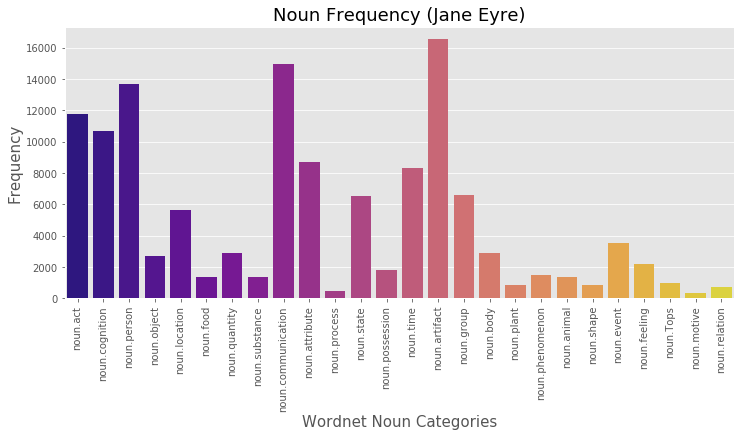

In [239]:
X = list(list2.keys())
y = list(list2.values())
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.title('Noun Frequency (Jane Eyre)',size=18)
plt.xlabel('Wordnet Noun Categories',size=15)
plt.ylabel('Frequency',size=15)
sns.barplot(X,y,palette='plasma')

In [240]:
list1 = []
for item in tagged_eyre:
    if (item[1] in {'VB','VBP','VBG','VBD','VBN','VBZ'}):
        list1.append(item)
print("Total number of Verbs in Jane Eyre are : "+ str(len(list1)))

Total number of Verbs in Jane Eyre are : 21700


In [241]:
list2 = {}
from nltk.corpus import wordnet

for item in list1:
    cat = wordnet.synsets(item[0])
    for i in cat:
        if i.lexname()[0] == 'v':
            if i.lexname() in list2:
                list2[i.lexname()]+=1
            else:
                list2[i.lexname()]=1

In [242]:
print('Categories of Verbs in Wordnet and their respective frequency is given below.. (for Jane Eyre)')
print()
print(list2)
print()
print('Total categoris in Verbs in the wordnet are : ' + str(len(list2)))

Categories of Verbs in Wordnet and their respective frequency is given below.. (for Jane Eyre)

{'verb.stative': 26317, 'verb.creation': 10462, 'verb.possession': 15265, 'verb.communication': 25733, 'verb.cognition': 22548, 'verb.social': 15738, 'verb.motion': 19268, 'verb.consumption': 3480, 'verb.contact': 15134, 'verb.change': 21392, 'verb.body': 6331, 'verb.perception': 11202, 'verb.competition': 4680, 'verb.emotion': 3793, 'verb.weather': 365}

Total categoris in Verbs in the wordnet are : 15


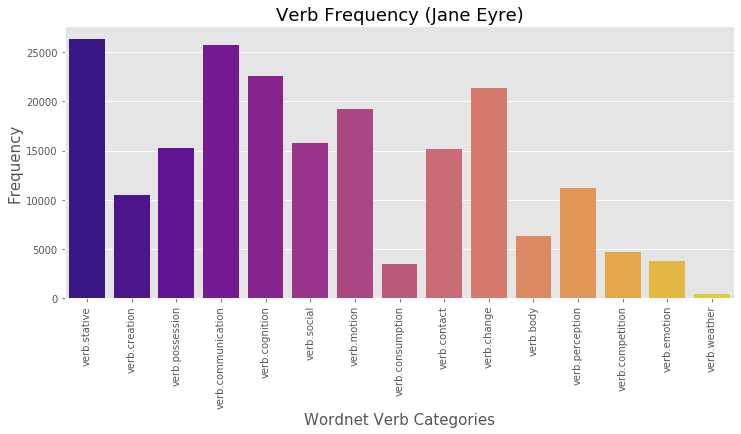

In [243]:
X = list(list2.keys())
y = list(list2.values())
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.title('Verb Frequency (Jane Eyre)',size=18)
plt.xlabel('Wordnet Verb Categories',size=15)
plt.ylabel('Frequency',size=15)
sns.barplot(X,y,palette='plasma')

In [278]:
nlp = en_core_web_sm.load()
doc = nlp(cleantext_eyre)

In [279]:
entity_list = {}
entity_list = [(X.text, X.label_) for X in doc.ents]
print(entity_list)

[('jane eyre', 'PERSON'), ('charlotte bronte', 'ORG'), ('gutenberg', 'PERSON'), ('wwwgutenbergorgtitle jane eyre       ', 'ORG'), ('april 29 2007', 'DATE'), ('jane eyretranscribed', 'PERSON'), ('1897', 'DATE'), ('david price', 'PERSON'), ('paton5 henrietta', 'PERSON'), ('m', 'PRODUCT'), ('first', 'ORDINAL'), ('jane eyre', 'FAC'), ('second', 'ORDINAL'), ('three', 'CARDINAL'), ('aspirantto', 'PERSON'), ('frank liberality', 'PERSON'), ('unrecommendedauthorthe press', 'ORG'), ('mei', 'PERSON'), ('jane eyre', 'PERSON'), ('first', 'ORDINAL'), ('mark broadlyand', 'PERSON'), ('exposeto', 'PERSON'), ('itto', 'ORG'), ('micaiah', 'GPE'), ('our own days', 'DATE'), ('imlah', 'NORP'), ('israel', 'GPE'), ('vitala mien', 'PERSON'), ('someof', 'GPE'), ('greek', 'NORP'), ('eagle', 'ORG'), ('tributeof', 'GPE'), ('second', 'ORDINAL'), ('jane eyrecurrer belldecember 21st', 'PERSON'), ('third', 'ORDINAL'), ('editioni avail', 'PERSON'), ('third', 'ORDINAL'), ('bellapril 13th', 'DATE'), ('ithere', 'PERSON'), 

In [280]:
entity_person = [X for X in entity_list if X[1]=='PERSON']
entity_organisation = [X for X in entity_list if X[1]=='ORG']
entity_location = [X for X in entity_list if X[1]=='LOC']

In [281]:
print('Total entities for Persons are : ' + str(len(entity_person)))
print('Total entities for Organisations are : ' + str(len(entity_organisation)))
print('Total entities for Locations are : ' + str(len(entity_location)))

Total entities for Persons are : 1250
Total entities for Organisations are : 313
Total entities for Locations are : 101


In [282]:
print('First 15 words with Person as entity')
print()
print(entity_person[:15])
print()
print('First 15 words with Organization as entity')
print()
print(entity_organisation[:15])
print()
print('First 15 words with Location as entity')
print()
print(entity_location[:15])

First 15 words with Person as entity

[('jane eyre', 'PERSON'), ('gutenberg', 'PERSON'), ('jane eyretranscribed', 'PERSON'), ('david price', 'PERSON'), ('paton5 henrietta', 'PERSON'), ('aspirantto', 'PERSON'), ('frank liberality', 'PERSON'), ('mei', 'PERSON'), ('jane eyre', 'PERSON'), ('mark broadlyand', 'PERSON'), ('exposeto', 'PERSON'), ('vitala mien', 'PERSON'), ('jane eyrecurrer belldecember 21st', 'PERSON'), ('editioni avail', 'PERSON'), ('ithere', 'PERSON')]

First 15 words with Organization as entity

[('charlotte bronte', 'ORG'), ('wwwgutenbergorgtitle jane eyre       ', 'ORG'), ('unrecommendedauthorthe press', 'ORG'), ('itto', 'ORG'), ('eagle', 'ORG'), ('directlymiss', 'ORG'), ('meto', 'ORG'), ('friendlessmrs reed', 'ORG'), ('childrenmrs reed', 'ORG'), ('ifmr reed', 'ORG'), ('iti', 'ORG'), ('ceilingand', 'ORG'), ('the swift darting beam', 'ORG'), ('ill', 'ORG'), ('notyes', 'ORG')]

First 15 words with Location as entity

[('the north cape', 'LOC'), ('the northern ocean', 'LOC'

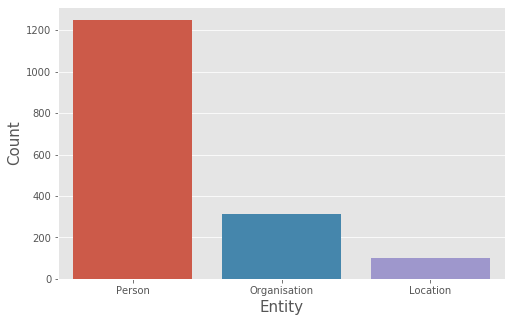

In [283]:
plot = [len(entity_person),len(entity_organisation),len(entity_location)]
X = ['Person','Organisation','Location']
plt.figure(figsize=(8,5))
plt.xlabel('Entity',size=15)
plt.ylabel('Count',size=15)
sns.barplot(X,plot)